## Step 1: Data Readind and Understanding

In [306]:
# importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [307]:
bike = pd.read_csv("/Users/pulkitgupta/Downloads/day.csv")

In [308]:
bike.shape

(730, 16)

In [309]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [310]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [311]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [312]:
bike.isnull().sum()
# No missing values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Finding the Categorical and Numerical Variables:

Categorical :
   - dteday
   - season
   - yr
   - mnth
   - holiday
   - weekday
   - workingday
   - weathersit
   
   
Numerical:
   - instant
   - temp
   - atemp
   - hum
   - windspeed
   - casual
   - registered
   - cnt 

In [313]:
# Renaming the columns
bike.rename(columns = {'weathersit':'weather','yr':'year','hum':'humidity','dteday':'date'}, inplace = True)
bike.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [314]:
# Rounding off certain columns to 1 digit for ease of analysis

bike['temp']= bike['temp'].apply(lambda x : round(x,1))
bike['atemp']= bike['atemp'].apply(lambda x : round(x,1))
bike['humidity']= bike['humidity'].apply(lambda x : round(x,1))
bike['windspeed']= bike['windspeed'].apply(lambda x : round(x,1))

In [315]:
bike.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.1,18.2,80.6,10.7,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.9,17.7,69.6,16.7,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.1,9.5,43.7,16.6,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2,10.6,59.0,10.7,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.3,11.5,43.7,12.5,82,1518,1600


In [316]:
# Dropping columns not required 

bike= bike.drop(['date','instant'], axis =1)
bike.head()

,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.1,18.2,80.6,10.7,331,654,985
1,1,0,1,0,2,1,2,14.9,17.7,69.6,16.7,131,670,801
2,1,0,1,0,3,1,1,8.1,9.5,43.7,16.6,120,1229,1349
3,1,0,1,0,4,1,1,8.2,10.6,59.0,10.7,108,1454,1562
4,1,0,1,0,5,1,1,9.3,11.5,43.7,12.5,82,1518,1600


# Step 2: Data Visualization 

### Visualising the numerical varaibles

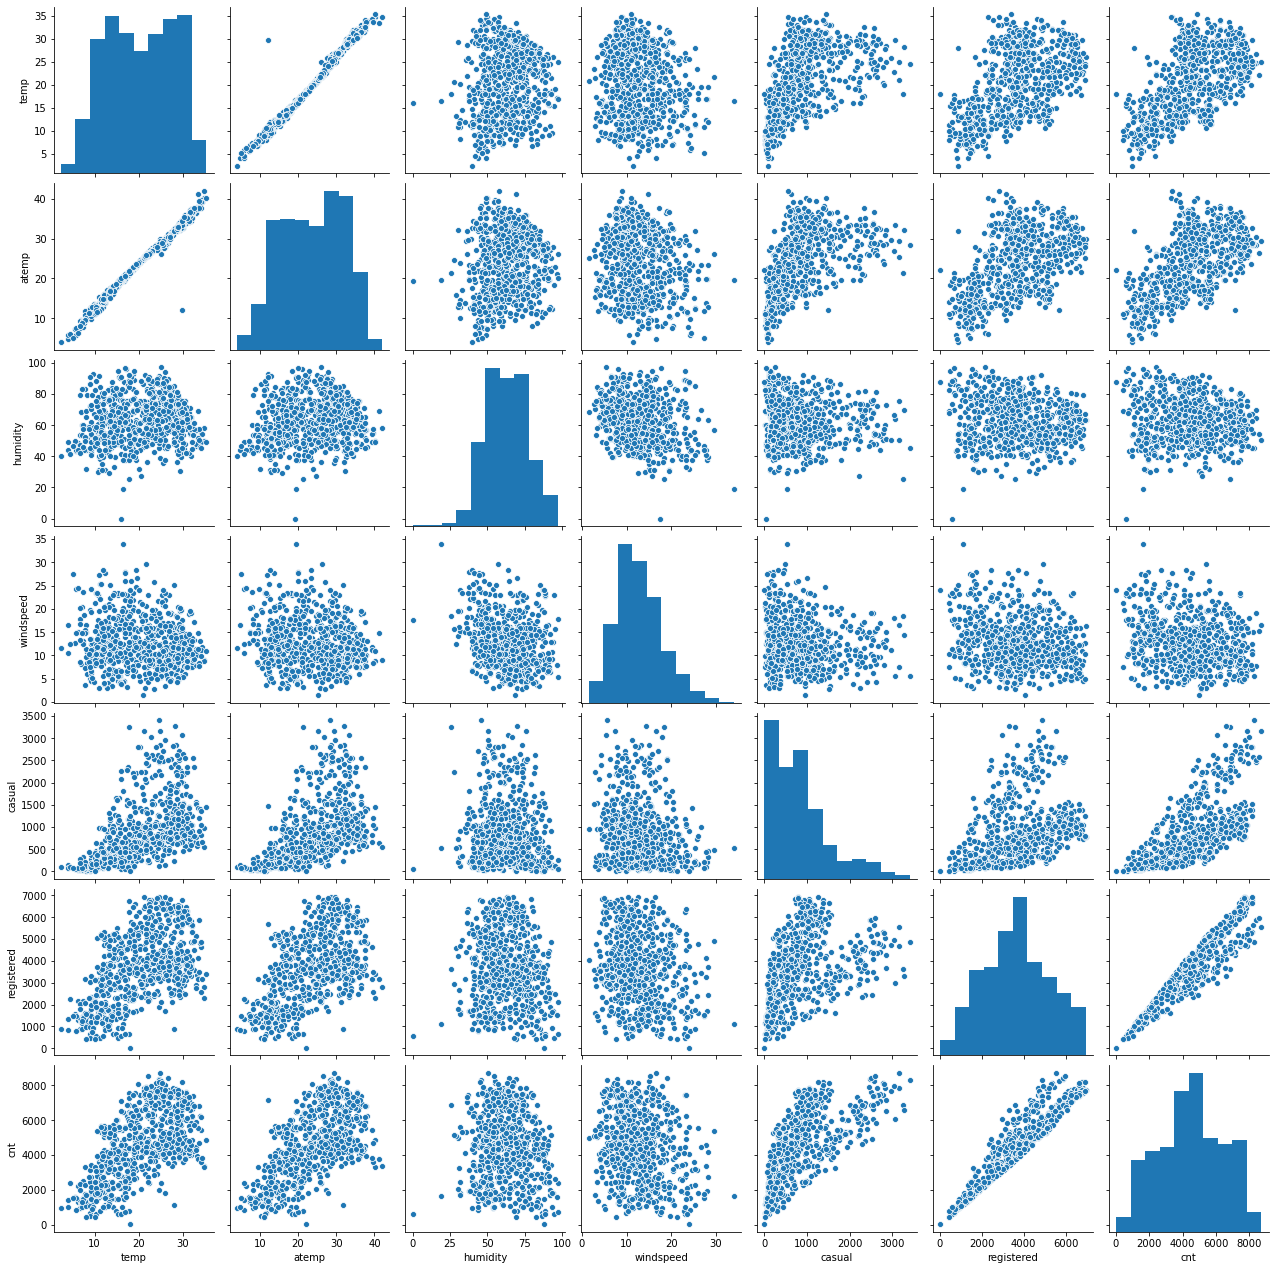

In [317]:
# Plotting the scatter plots for all numeric variables 
sns.pairplot(bike[['temp','atemp','humidity','windspeed','casual','registered','cnt']])
plt.show()

### Observations :
##### Cnt has some sort of linear relationship with Temp, atemp, casual and registered 
##### No pattern is there between Cnt and humidity, windspeed

In [321]:
cor = bike.corr()

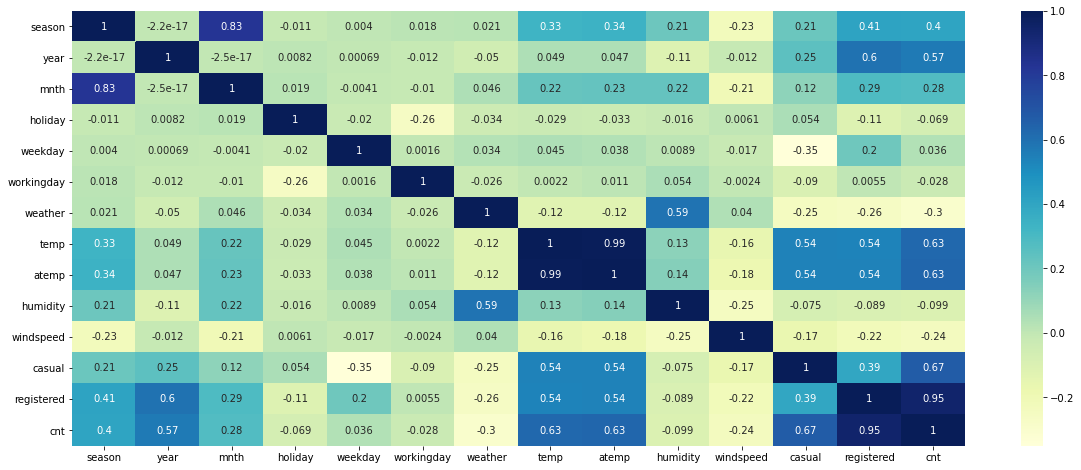

In [322]:
plt.figure(figsize =[20,8])
sns.heatmap(cor, annot= True, cmap ='YlGnBu')
plt.show()

In [323]:
# Inferences
##1. high correlation between registred and casual---multicollinearity exists
##2. high correlation between atemp and temp----multicollinearity exists

### Visualising Categorical variables 

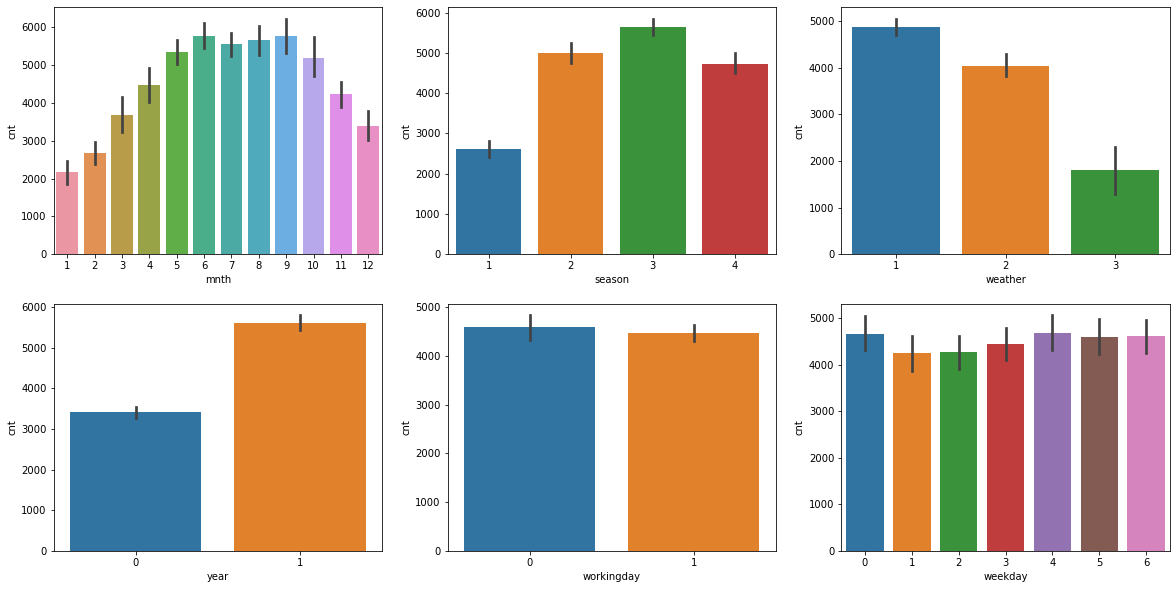

In [324]:
plt.figure(figsize = [20,10])

plt.subplot(2,3,1)
sns.barplot(x = 'mnth', y ='cnt', data=bike)
plt.subplot(2,3,2)
sns.barplot(x = 'season', y ='cnt', data=bike)
plt.subplot(2,3,3)
sns.barplot(x = 'weather', y ='cnt', data=bike)
plt.subplot(2,3,4)
sns.barplot(x = 'year', y ='cnt', data=bike)
plt.subplot(2,3,5)
sns.barplot(x = 'workingday', y ='cnt', data=bike)
plt.subplot(2,3,6)
sns.barplot(x = 'weekday', y ='cnt', data=bike)
plt.show()

# Step 3: Data Preparation and Creating dummy variables 

### Dummy variables ---As the Categorical variables : Mnth, Season, Weekday, Weather have more than 2 levels we have to divide the dataframe in dummy variables

In [325]:
bike['mnth'] = bike['mnth'].apply(str)
bike['season']= bike['season'].apply(str)
bike['weather'] = bike['weather'].apply(str)
bike['weekday'] = bike['weekday'].apply(str)

In [326]:
bike['mnth']= bike['mnth'].map({'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'})
bike['season']= bike['season'].map({'1':'spring','2':'summer','3':'fall','4':'winter'})
bike['weather'] = bike['weather'].map({'1':'clear','2':'mist+cloudy','3':'Light rain+snow'})
bike['weekday']= bike['weekday'].map({'1':'mon','2':'tue','3':'wed','4':'thu','5':'fri','6':'sat','0':'sun'})

In [327]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [328]:
mnth_dummies = pd.get_dummies(bike['mnth'],drop_first = True)
season_dummies = pd.get_dummies(bike['season'],drop_first = True)
weather_dummies = pd.get_dummies(bike['weather'],drop_first = True)
weekday_dummies = pd.get_dummies(bike['weekday'],drop_first = True)

In [329]:
bike = pd.concat([bike,mnth_dummies,season_dummies,weather_dummies,weekday_dummies], axis =1)
bike.head()

,season,year,mnth,holiday,weekday,workingday,weather,temp,atemp,humidity,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
0,spring,0,Jan,0,mon,1,mist+cloudy,14.1,18.2,80.6,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,tue,1,mist+cloudy,14.9,17.7,69.6,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,wed,1,clear,8.1,9.5,43.7,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,Jan,0,thu,1,clear,8.2,10.6,59.0,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,fri,1,clear,9.3,11.5,43.7,...,0,0,1,0,0,0,0,0,0,0


In [330]:
bike.columns

Index(['season', 'year', 'mnth', 'holiday', 'weekday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'spring', 'summer', 'winter', 'clear', 'mist+cloudy', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [331]:
bike.drop(['season','mnth','weekday','weather','registered','casual','year'], axis =1, inplace = True)

In [332]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holiday      730 non-null    int64  
 1   workingday   730 non-null    int64  
 2   temp         730 non-null    float64
 3   atemp        730 non-null    float64
 4   humidity     730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   Aug          730 non-null    uint8  
 8   Dec          730 non-null    uint8  
 9   Feb          730 non-null    uint8  
 10  Jan          730 non-null    uint8  
 11  Jul          730 non-null    uint8  
 12  Jun          730 non-null    uint8  
 13  Mar          730 non-null    uint8  
 14  May          730 non-null    uint8  
 15  Nov          730 non-null    uint8  
 16  Oct          730 non-null    uint8  
 17  Sep          730 non-null    uint8  
 18  spring       730 non-null    uint8  
 19  summer  

In [333]:
bike.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'spring', 'summer', 'winter', 'clear', 'mist+cloudy',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

# Step 4: Splitting the data into Training and Testing sets 

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [336]:
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
653,0,1,19.2,23.0,55.8,12.2,7534,0,0,0,...,0,1,1,0,0,0,0,0,0,1
576,0,1,29.2,33.1,70.4,11.1,7216,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0,0,17.0,20.7,62.1,10.8,4066,0,0,0,...,0,0,0,1,0,0,1,0,0,0
728,0,1,10.5,11.6,48.3,23.5,1796,0,1,0,...,0,0,1,0,1,0,0,0,0,0
482,0,0,15.4,18.9,49.0,8.7,4220,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [337]:
bike_train.shape

(510, 29)

In [338]:
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
184,1,0,29.8,33.3,63.8,5.5,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,1
535,0,1,32.1,36.0,59.2,7.6,6211,0,0,0,...,1,0,1,0,0,0,0,1,0,0
299,0,0,19.3,22.9,81.3,13.3,2659,0,0,0,...,0,1,0,1,0,1,0,0,0,0
221,0,1,31.4,34.2,42.4,13.4,4780,1,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0,0,29.3,32.2,30.5,19.6,4968,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [339]:
bike_test.shape

(219, 29)

In [340]:
scaler = MinMaxScaler()

In [341]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [342]:
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
653,0,1,0.510638,0.500000,0.575258,0.301282,7534,0,0,0,...,0,1,1,0,0,0,0,0,0,1
576,0,1,0.814590,0.765789,0.725773,0.266026,7216,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0,0,0.443769,0.439474,0.640206,0.256410,4066,0,0,0,...,0,0,0,1,0,0,1,0,0,0
728,0,1,0.246201,0.200000,0.497938,0.663462,1796,0,1,0,...,0,0,1,0,1,0,0,0,0,0
482,0,0,0.395137,0.392105,0.505155,0.189103,4220,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [343]:
bike_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.538077,0.513024,0.650643,0.321556,4486.382353,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.627451,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.157763,0.453386,0.225857,0.212847,0.145950,0.169615,1952.158739,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.483958,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.341185,0.332237,0.538402,0.198718,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542553,0.526316,0.654124,0.296474,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735562,0.689474,0.755155,0.416667,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


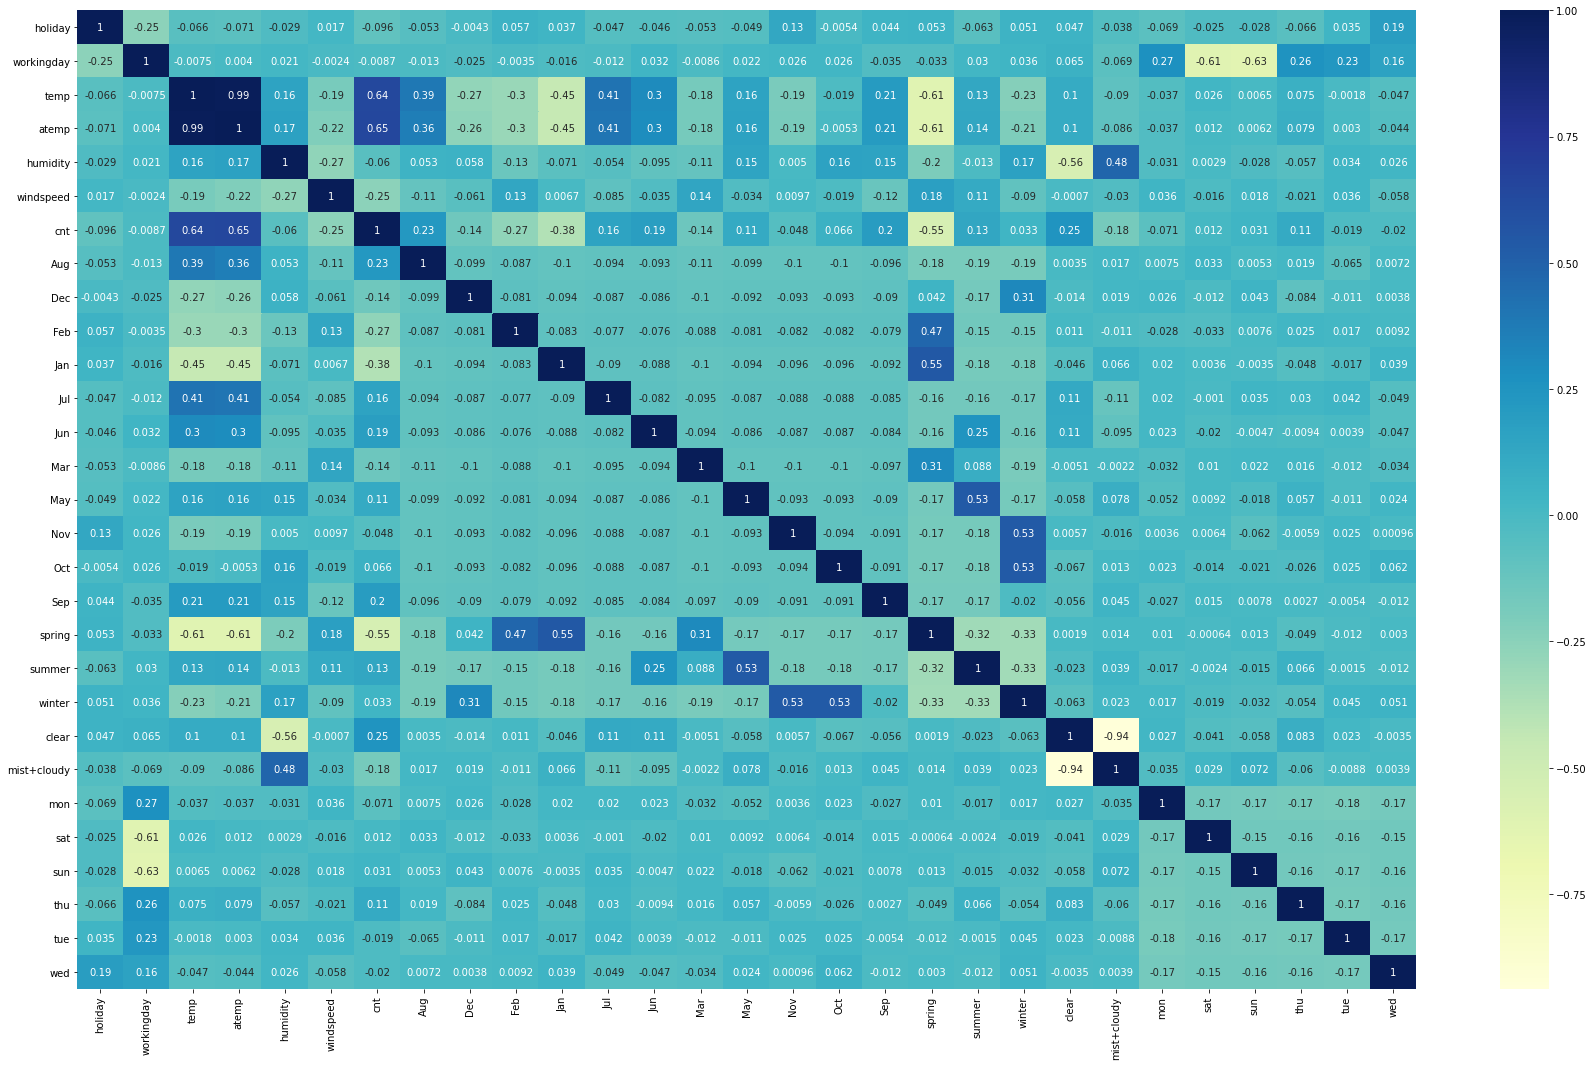

In [344]:
plt.figure(figsize = (30, 18))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 5: Building Linear Model 

In [345]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [346]:
X_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
653,0,1,0.510638,0.500000,0.575258,0.301282,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
576,0,1,0.814590,0.765789,0.725773,0.266026,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0,0,0.443769,0.439474,0.640206,0.256410,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
728,0,1,0.246201,0.200000,0.497938,0.663462,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
482,0,0,0.395137,0.392105,0.505155,0.189103,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [347]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [348]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          2965.917004
holiday       -2214.443817
workingday    -1561.076176
temp           6418.174096
atemp          -592.574683
humidity      -2491.989600
windspeed     -1728.447166
Aug            -215.469545
Dec            -461.510436
Feb            -206.422643
Jan            -226.989069
Jul            -956.947667
Jun            -613.224621
Mar             -30.862442
May            -255.246324
Nov            -503.459618
Oct            -329.104107
Sep             374.700211
spring         -198.172423
summer          525.957040
winter         1343.548509
clear          2180.543095
mist+cloudy    1810.482610
mon            -202.656707
sat           -1519.096684
sun           -1365.793649
thu             131.169614
tue             -95.557436
wed               6.146051
dtype: float64

In [349]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     25.92
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           2.53e-78
Time:                        10:11:41   Log-Likelihood:                -4352.7
No. Observations:                 510   AIC:                             8763.
Df Residuals:                     481   BIC:                             8886.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2965.9170   1277.959      2.321      

In [350]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,436.20
3,atemp,377.64
1,workingday,82.96
4,humidity,38.49
20,clear,25.35
24,sun,16.31
23,sat,15.41
17,spring,13.73
21,mist+cloudy,12.78
19,winter,12.53


In [351]:
## 1. Drop columns with high P-values and high VIFs 
## 2. Drop cilumns with high VIFs 
## 3. Drop columns with VIFs at the end

## This will hierarchical process of dropping the columns and updating the model.

### Dropping the columns and updating the model

In [352]:
X_train = X_train.drop(['atemp','spring'],axis = 1)

In [353]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          2859.622356
holiday       -2209.095945
workingday    -1559.122779
temp           5878.664007
humidity      -2507.503510
windspeed     -1717.628396
Aug             -92.706713
Dec            -480.517368
Feb            -284.515602
Jan            -301.601665
Jul            -843.229719
Jun            -567.112073
Mar             -81.422492
May            -253.224731
Nov            -497.104167
Oct            -326.675358
Sep             465.580729
summer          635.970740
winter         1451.457111
clear          2160.677572
mist+cloudy    1793.640143
mon            -207.285357
sat           -1515.512748
sun           -1363.228243
thu             132.632001
tue             -97.374119
wed               6.584075
dtype: float64

In [354]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.05e-79
Time:                        10:11:52   Log-Likelihood:                -4352.9
No. Observations:                 510   AIC:                             8760.
Df Residuals:                     483   BIC:                             8874.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2859.6224   1250.683      2.286      

In [355]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,78.09
2,temp,43.45
3,humidity,38.06
18,clear,24.73
22,sun,15.38
21,sat,14.41
19,mist+cloudy,12.54
17,winter,8.09
13,Nov,7.21
14,Oct,6.96


### Dropping the columns and updating the model

In [356]:
X_train = X_train.drop(['Aug','Mar','Feb','Jan','Oct','thu','wed','tue'],axis = 1)

In [357]:
X_train_lm = sm.add_constant(X_train)

lm_2 = sm.OLS(y_train, X_train_lm).fit()

lm_2.params

const          2573.300447
holiday       -2207.882320
workingday    -1484.005805
temp           6157.924900
humidity      -2629.410662
windspeed     -1741.764070
Dec            -182.455596
Jul            -767.258812
Jun            -564.963757
May            -246.020915
Nov            -175.342694
Sep             626.661298
summer          783.049296
winter         1338.504610
clear          2144.989329
mist+cloudy    1787.043692
mon            -215.634498
sat           -1453.056896
sun           -1298.023848
dtype: float64

In [358]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     40.82
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.82e-85
Time:                        10:11:55   Log-Likelihood:                -4354.0
No. Observations:                 510   AIC:                             8746.
Df Residuals:                     491   BIC:                             8826.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2573.3004   1159.284      2.220      

In [359]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,61.53
3,humidity,33.91
13,clear,22.88
2,temp,13.56
17,sun,12.09
14,mist+cloudy,11.85
16,sat,11.30
4,windspeed,5.23
0,holiday,2.65
12,winter,2.64


### Dropping the columns and updating the model

In [360]:
X_train = X_train.drop(['Nov','Dec','May'], axis =1)

X_train_lm = sm.add_constant(X_train)

lm_3 = sm.OLS(y_train, X_train_lm).fit()

lm_3.params

const          2709.555842
holiday       -2286.371574
workingday    -1559.819266
temp           6164.866933
humidity      -2706.252460
windspeed     -1712.934790
Jul            -745.467862
Jun            -495.850246
Sep             672.114201
summer          706.598225
winter         1258.094986
clear          2093.485281
mist+cloudy    1746.190667
mon            -212.450255
sat           -1531.108527
sun           -1373.233393
dtype: float64

In [361]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     48.99
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.32e-87
Time:                        10:11:59   Log-Likelihood:                -4354.9
No. Observations:                 510   AIC:                             8742.
Df Residuals:                     494   BIC:                             8810.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2709.5558   1147.288      2.362      

In [362]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,60.47
3,humidity,33.12
10,clear,22.60
2,temp,12.24
14,sun,11.91
11,mist+cloudy,11.77
13,sat,11.10
4,windspeed,5.18
0,holiday,2.58
8,summer,1.78


### Dropping the columns and updating the model

In [363]:
X_train = X_train.drop(['workingday','humidity'], axis =1)

X_train_lm = sm.add_constant(X_train)

lm_4 = sm.OLS(y_train, X_train_lm).fit()

lm_4.params

const         -1068.706077
holiday        -972.959903
temp           5695.044870
windspeed     -1203.931599
Jul            -603.284063
Jun            -331.123641
Sep             641.596263
summer          670.866477
winter         1105.259882
clear          2824.077287
mist+cloudy    2056.968176
mon            -205.726108
sat              50.360349
sun             216.899685
dtype: float64

In [364]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     51.59
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.98e-83
Time:                        10:12:14   Log-Likelihood:                -4369.1
No. Observations:                 510   AIC:                             8766.
Df Residuals:                     496   BIC:                             8826.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1068.7061    419.075     -2.550      

In [365]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,9.53
8,clear,7.40
9,mist+cloudy,4.34
2,windspeed,4.12
6,summer,1.78
3,Jul,1.63
7,winter,1.53
4,Jun,1.36
5,Sep,1.33
10,mon,1.27


In [366]:
X_train = X_train.drop(['sat'], axis =1)

X_train_lm = sm.add_constant(X_train)

lm_5 = sm.OLS(y_train, X_train_lm).fit()

lm_5.params

const         -1056.132682
holiday        -977.342511
temp           5697.131873
windspeed     -1204.415651
Jul            -603.939706
Jun            -332.566869
Sep             641.369188
summer          670.037214
winter         1104.006406
clear          2819.969883
mist+cloudy    2054.286489
mon            -214.978164
sun             207.501700
dtype: float64

In [368]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     55.99
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           2.70e-84
Time:                        10:13:35   Log-Likelihood:                -4369.2
No. Observations:                 510   AIC:                             8764.
Df Residuals:                     497   BIC:                             8819.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1056.1327    416.376     -2.536      

In [367]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,9.49
8,clear,7.35
9,mist+cloudy,4.29
2,windspeed,4.11
6,summer,1.77
3,Jul,1.63
7,winter,1.53
4,Jun,1.36
5,Sep,1.33
10,mon,1.23


In [369]:
len(X_train.columns)

12

# Step 6: Residual Analysis of the train data

In [370]:
y_train_cnt = lm_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

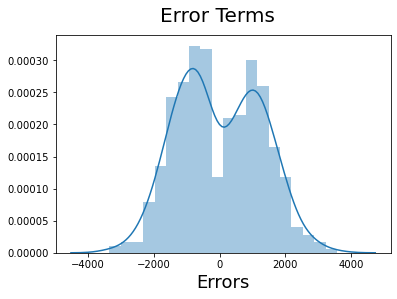

In [371]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)

# Step 7: Making Predictions Using the Final Model

In [372]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [373]:
bike_test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,clear,mist+cloudy,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.559729,0.533009,0.638766,0.314146,4546.981735,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.652968,0.319635,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.188034,0.481313,0.233758,0.218430,0.149036,0.159756,1898.633630,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.477117,0.467403,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.048632,0.023684,0.261856,-0.041667,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354103,0.344737,0.527320,0.198718,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.559271,0.550000,0.627835,0.301282,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759878,0.714474,0.744330,0.403846,5869.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984802,0.981579,1.002062,0.807692,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [374]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holiday      219 non-null    int64  
 1   workingday   219 non-null    int64  
 2   temp         219 non-null    float64
 3   atemp        219 non-null    float64
 4   humidity     219 non-null    float64
 5   windspeed    219 non-null    float64
 6   cnt          219 non-null    int64  
 7   Aug          219 non-null    uint8  
 8   Dec          219 non-null    uint8  
 9   Feb          219 non-null    uint8  
 10  Jan          219 non-null    uint8  
 11  Jul          219 non-null    uint8  
 12  Jun          219 non-null    uint8  
 13  Mar          219 non-null    uint8  
 14  May          219 non-null    uint8  
 15  Nov          219 non-null    uint8  
 16  Oct          219 non-null    uint8  
 17  Sep          219 non-null    uint8  
 18  spring       219 non-null    uint8  
 19  summer 

In [375]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [377]:
X_test_m5 = sm.add_constant(X_test)

In [378]:
X_test_m5 = X_test_m5.drop(['atemp','spring','Aug','Mar','Feb','Jan','Oct','thu','wed','tue','Nov','Dec','May','workingday','humidity','sat'], axis = 1)

In [379]:
y_pred_m5 = lm_5.predict(X_test_m5)

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

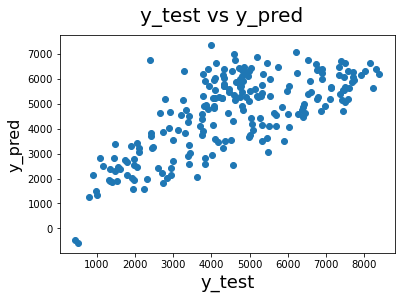

In [380]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)     
plt.ylabel('y_pred', fontsize = 16) 

We can see that the equation of our best fitted line is:

cnt = -1056.13- 977.34xholiday + 5697.13xtemp - 1204.41xwinspeed - 603.93xJul- 332.57xJun + 641.36xsep + 670.03xsummer
      + 1104.00xwinter + 2819.97xclear + 2054.28xmist+cloudy - 214.72xmon + 207.xsun

#### Overall we have a decent model with R2 of approx 58%, but we also acknowledge that we could do better.
##### We have a couple of options:
##### Add new features
##### Build a non-linear model